In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/Stud.csv')

In [4]:
df.shape

(1000, 8)

In [5]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [6]:
df.isna().sum() #if missing values found replace them with mean

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.duplicated().sum() #if duplicates found remove them

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
print("categories in 'gender' variable:   ",end=" ")
print(df['gender'].unique())
print("categories in 'race/ethnicity' variable:   ",end=" ")
print(df['race/ethnicity'].unique())
print("categories in 'parental level of education' variable:   ",end=" ")
print(df['parental level of education'].unique())
print("categories in 'lunch' variable:   ",end=" ")
print(df['lunch'].unique())
print("categories in 'test preparation course' variable:   ",end=" ")
print(df['test preparation course'].unique())

categories in 'gender' variable:    ['female' 'male']
categories in 'race/ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:    ['standard' 'free/reduced']
categories in 'test preparation course' variable:    ['none' 'completed']


In [12]:
numeric_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print('we have {} numerical features: {}'.format(len(numeric_features),numeric_features))
print('we have {} categorical features: {}'.format(len(categorical_features),categorical_features))

we have 3 numerical features: ['math score', 'reading score', 'writing score']
we have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [13]:
df['total_score']=df['math score']+df['reading score']+df['writing score']
df['average_score']=df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full = df[df['reading score']==100]['average_score'].count()
writing_full = df[df['writing score']==100]['average_score'].count()
math_full = df[df['math score']==100]['average_score'].count()

print(f'Number of students with full marks in reading: {reading_full}')
print(f'Number of students with full marks in writing: {writing_full}')
print(f'Number of students with full marks in math: {math_full}')


Number of students with full marks in reading: 17
Number of students with full marks in writing: 14
Number of students with full marks in math: 7


In [15]:
reading_less_20 = df[df['reading score']<=20]['average_score'].count()
writing_less_20 = df[df['writing score']<=20]['average_score'].count()
math_less_20 = df[df['math score']<=20]['average_score'].count()

print(f'Number of students with less than 20 marks in reading: {reading_less_20}')
print(f'Number of students with less than 20 marks in writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in math: {math_less_20}')

Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing: 3
Number of students with less than 20 marks in math: 4


Students are poor in maths we can see

### Visualization

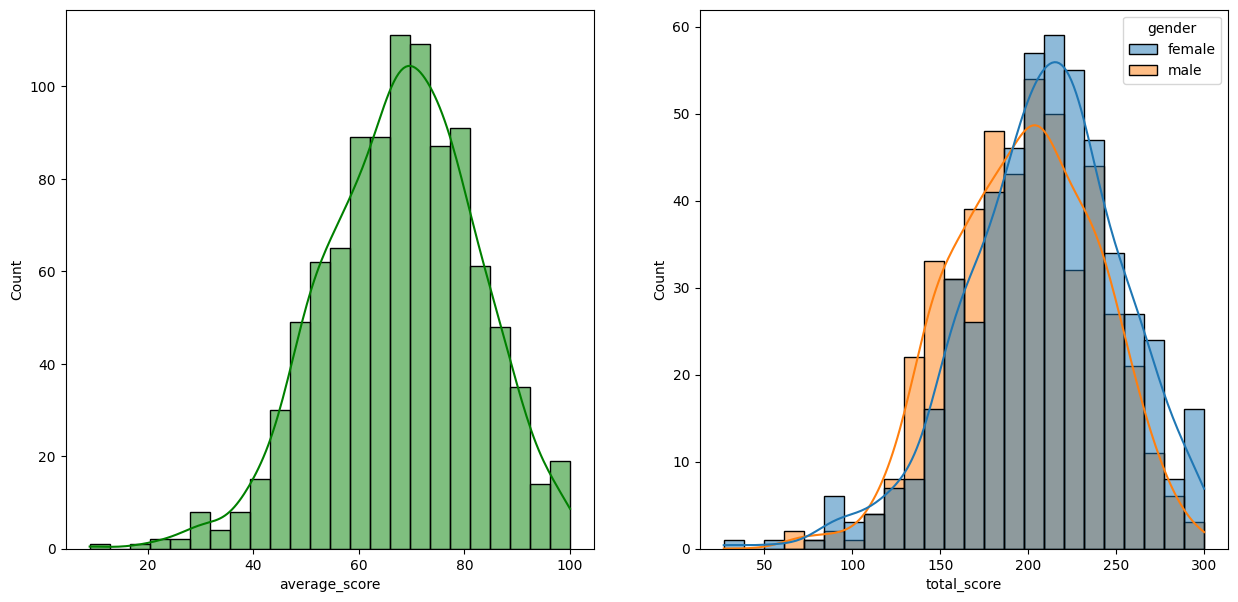

In [16]:
fig ,axe = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

Female students performed well than male students.

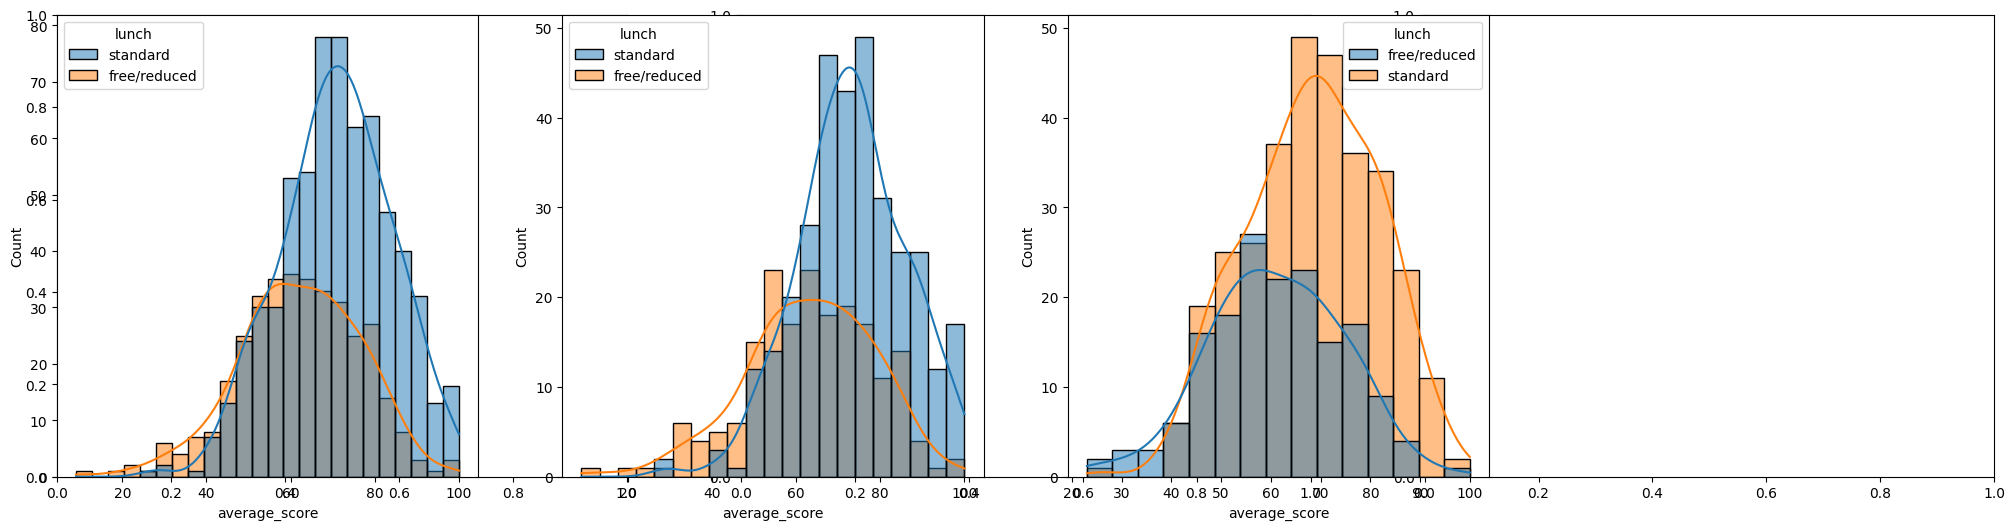

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

Standard lunch helps perform well in exams be it male or female

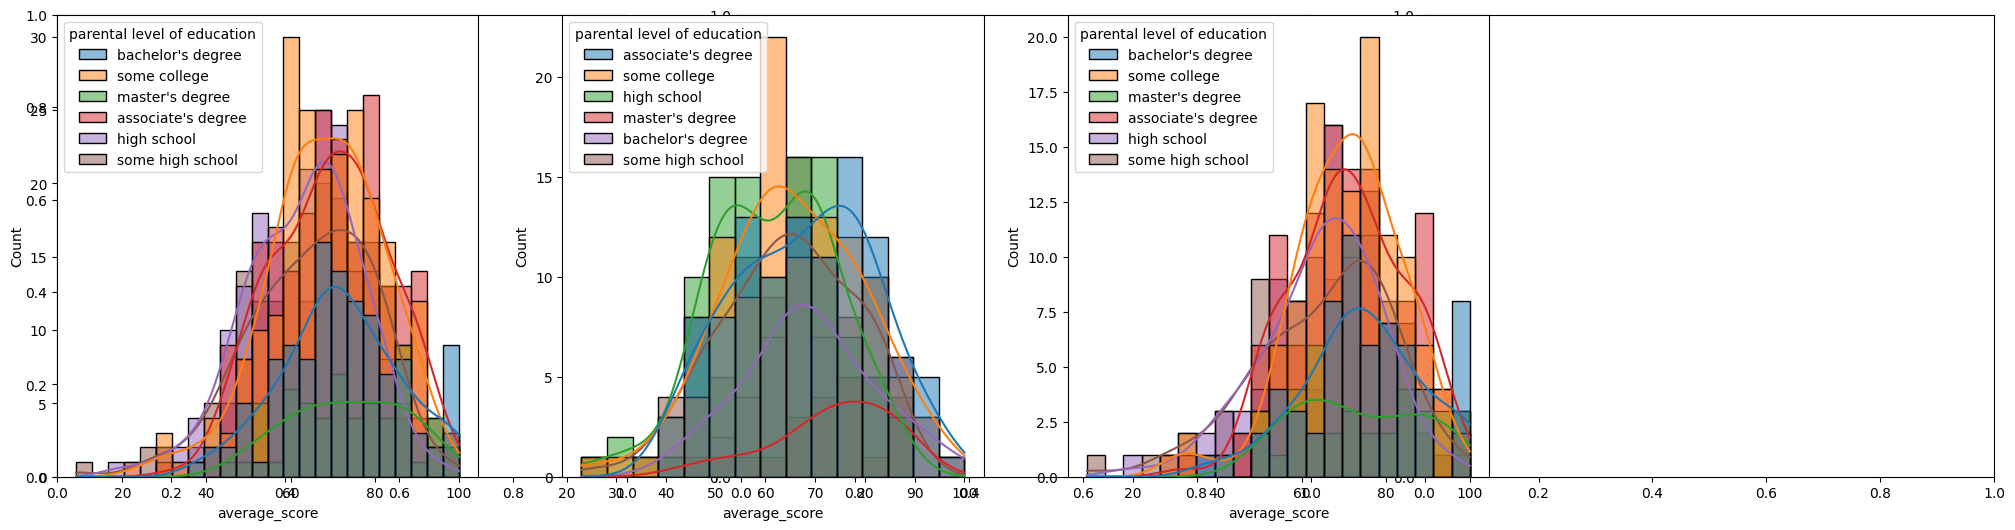

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='average_score',kde=True,hue='parental level of education')
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental level of education')
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental level of education')
plt.show()

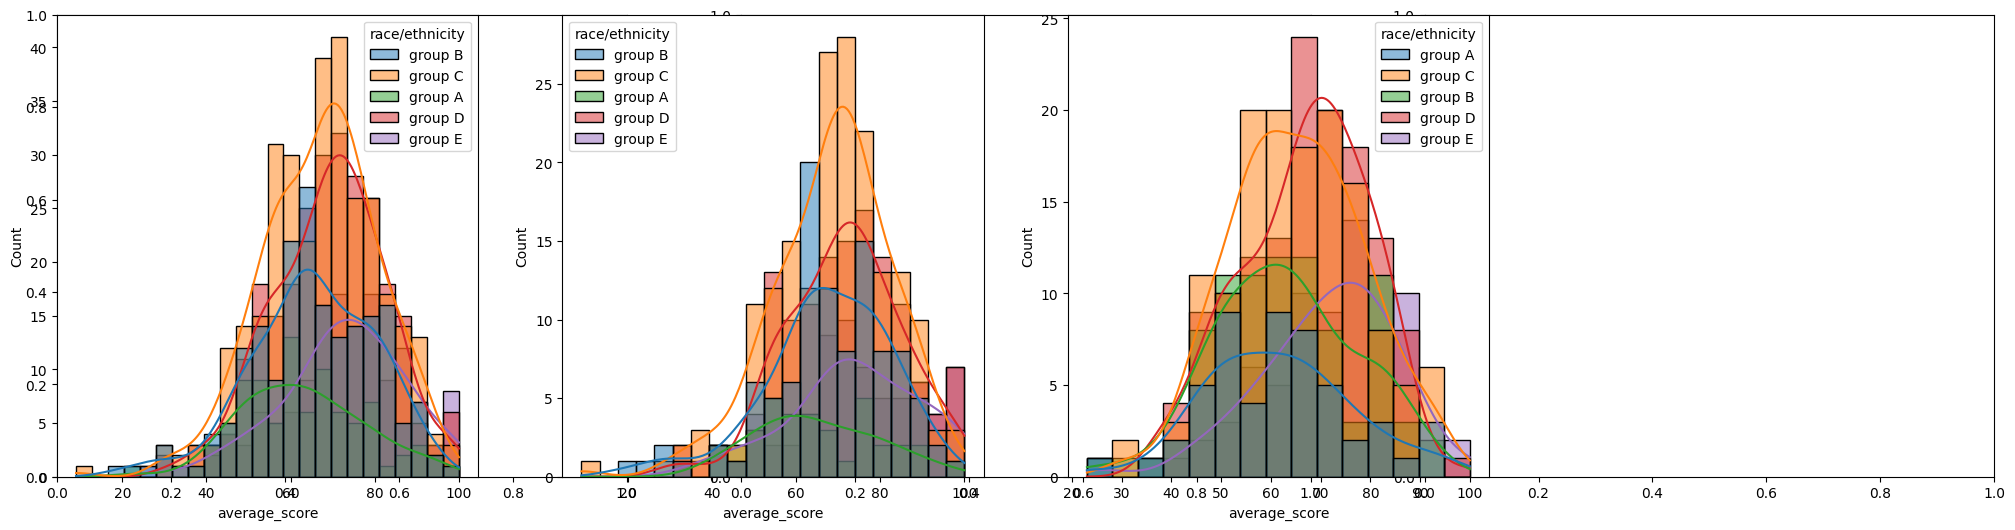

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='average_score',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race/ethnicity')
plt.show()

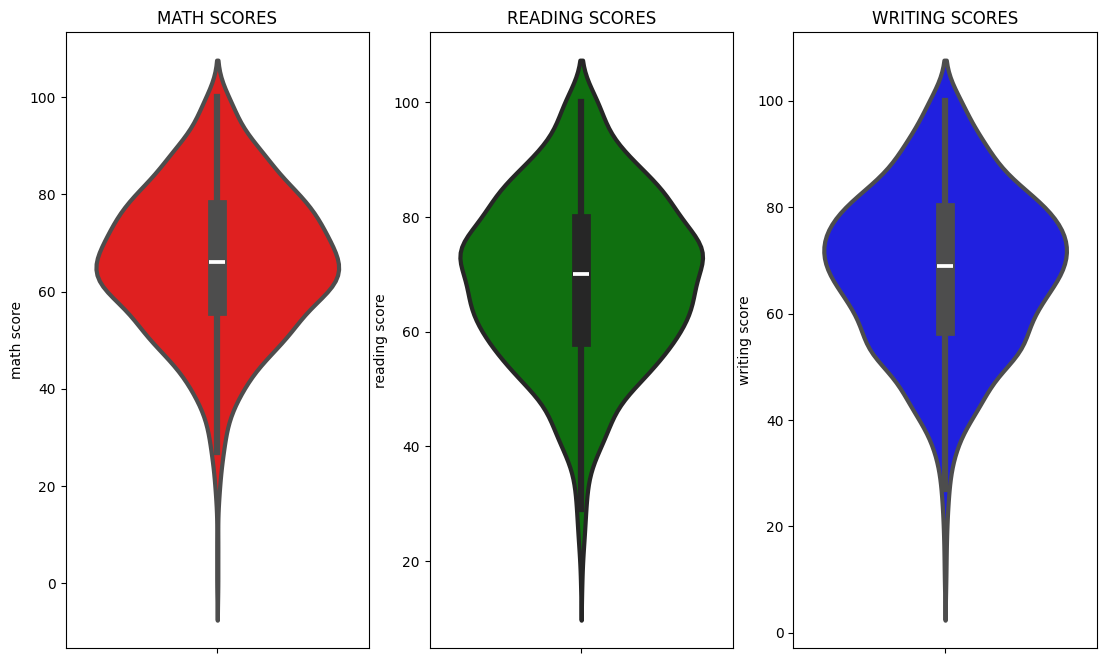

In [20]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score', data=df, color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score', data=df, color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score', data=df, color='blue',linewidth=3)
plt.show()

Most Of the students scored between 60-80 in all the subjects

### Multivariate Analysis

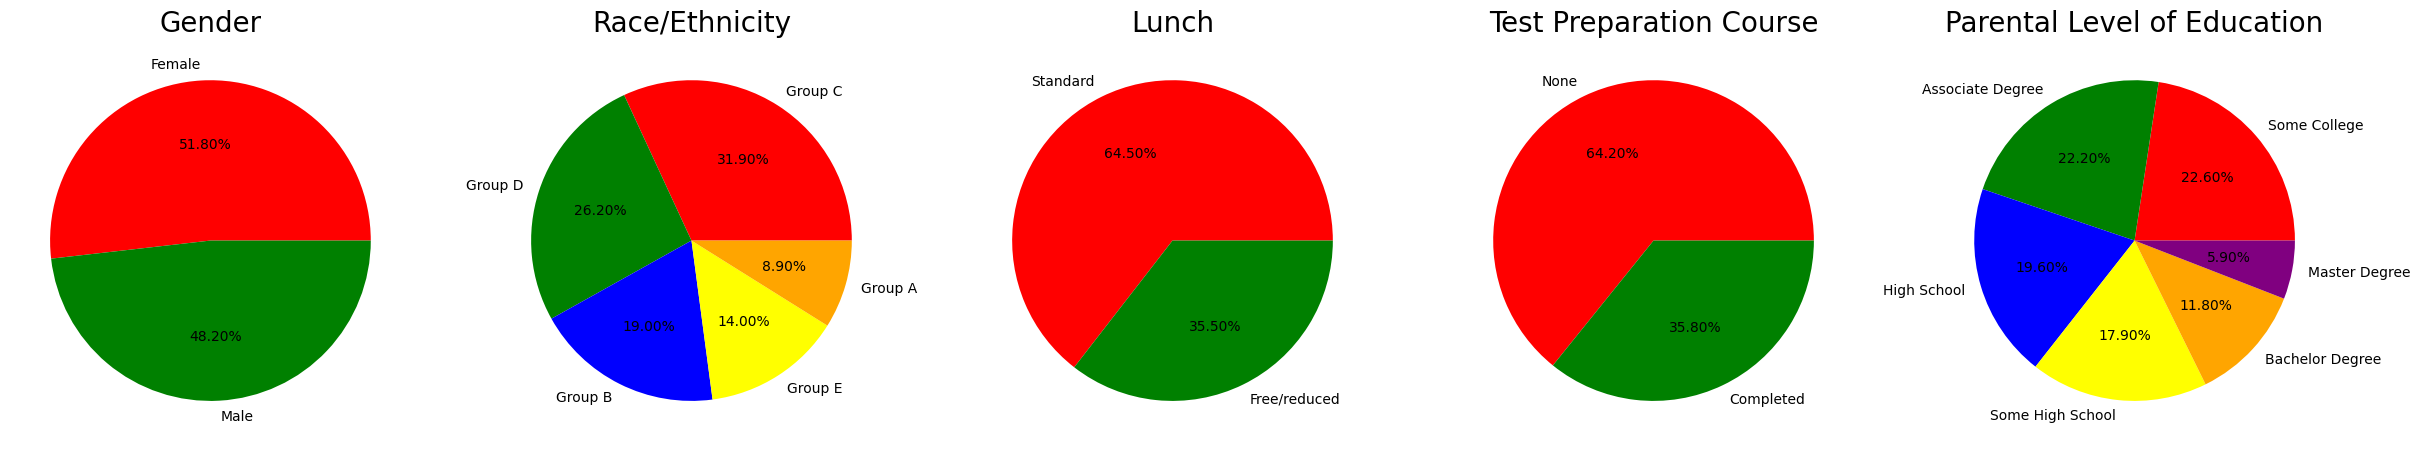

In [21]:
plt.rcParams['figure.figsize'] = (30,12)
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels= 'Female','Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels= 'Group C','Group D','Group B','Group E','Group A'
color = ['red','green','blue','yellow','orange']

plt.pie(size, colors = color, labels = labels, autopct = '%.2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels= 'Standard','Free/reduced'
color = ['red','green']


plt.pie(size, colors = color, labels = labels, autopct = '%.2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels= 'None','Completed'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '%.2f%%')
plt.title('Test Preparation Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels= 'Some College','Associate Degree','High School','Some High School','Bachelor Degree','Master Degree'
color = ['red','green','blue','yellow','orange','purple']

plt.pie(size, colors = color, labels = labels, autopct = '%.2f%%')
plt.title('Parental Level of Education', fontsize = 20)
plt.axis('off')
plt.show()

### Univariate Analysis

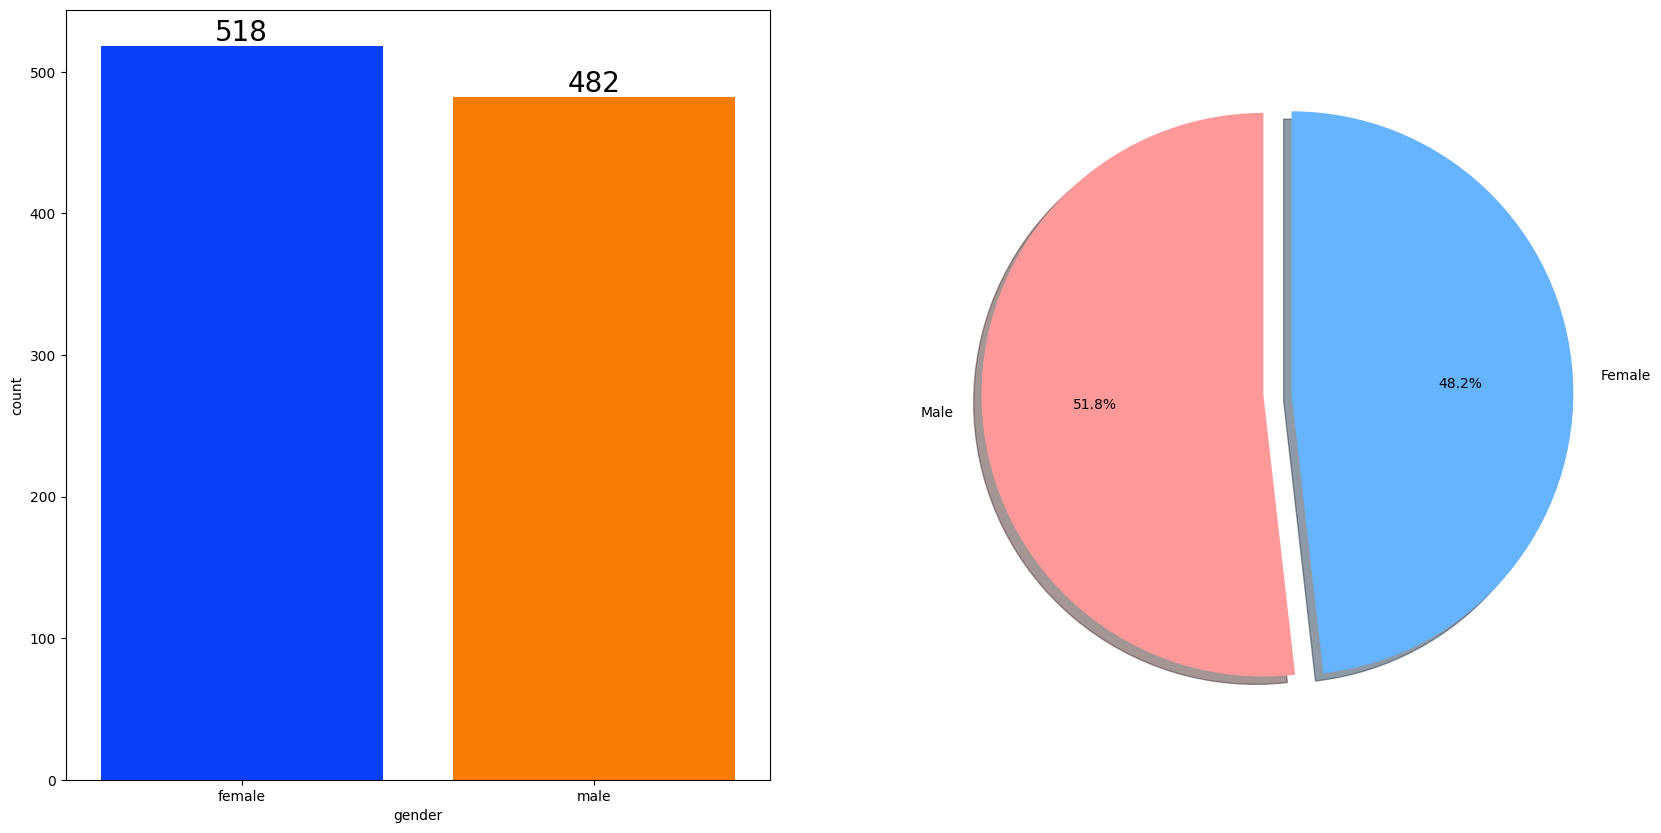

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))  # Use 'fig' instead of 'f'
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Ensure that the pie chart is drawn on ax[1]
ax[1].pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0, 0.1],
          autopct='%1.1f%%', shadow=True, startangle=90, colors=['#ff9999', '#66b3ff'])
plt.show()


In [23]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


In [24]:
# Select only numeric columns for the mean calculation
numeric_cols = df.select_dtypes(include='number').columns

# Group by 'gender' and calculate the mean for numeric columns
gender_group = df.groupby('gender')[numeric_cols].mean()
gender_group


,math score,reading score,writing score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


<Axes: xlabel='reading score', ylabel='race/ethnicity'>

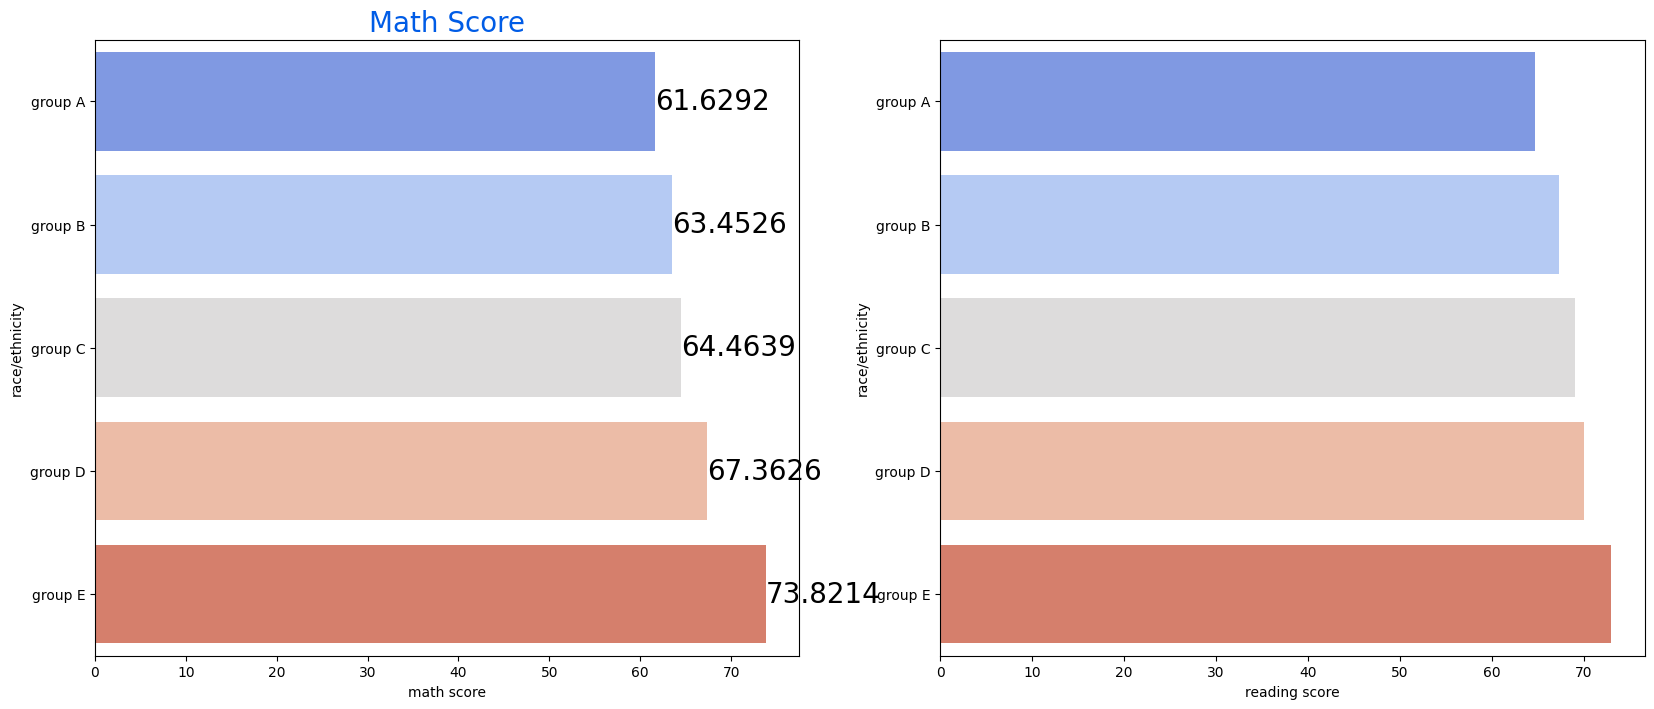

In [25]:
Group_data = df.groupby('race/ethnicity')
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x=Group_data['math score'].mean(),y=Group_data['math score'].mean().index,ax=ax[0],palette='coolwarm')
ax[0].set_title('Math Score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
sns.barplot(x=Group_data['reading score'].mean(),y=Group_data['reading score'].mean().index,ax=ax[1],palette='coolwarm')

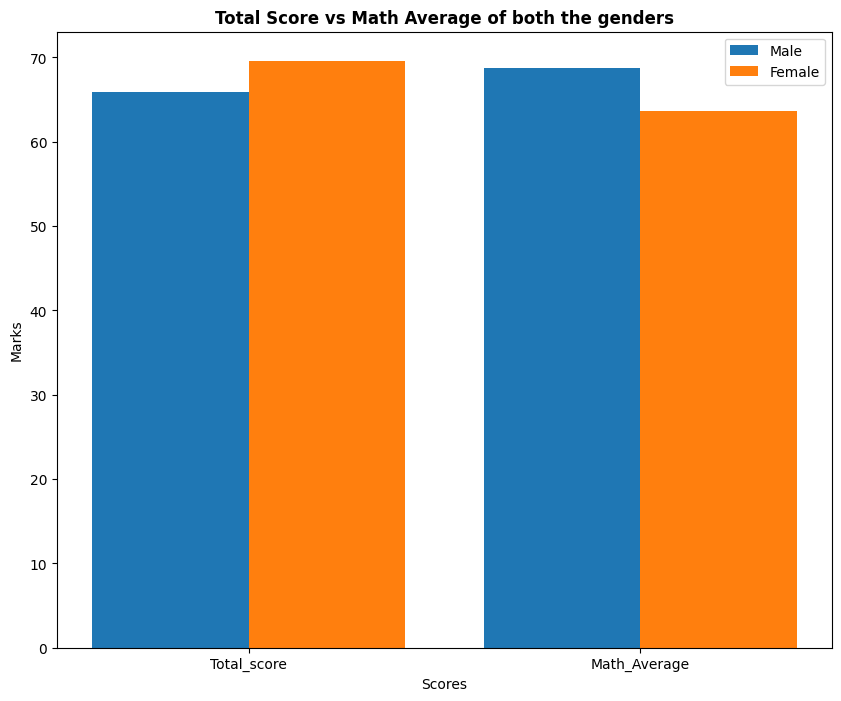

In [27]:
plt.figure(figsize=(10,8))
X=['Total_score','Math_Average']

female_scores = [gender_group['average_score'][0],gender_group['math score'][0]]
male_scores = [gender_group['average_score'][1],gender_group['math score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2,male_scores,0.4,label='Male')
plt.bar(X_axis + 0.2,female_scores,0.4,label='Female')

plt.xticks(X_axis,X)
plt.xlabel('Scores')
plt.ylabel('Marks')
plt.title("Total Score vs Math Average of both the genders",fontweight='bold')
plt.legend()
plt.show()


<Axes: xlabel='lunch', ylabel='writing score'>

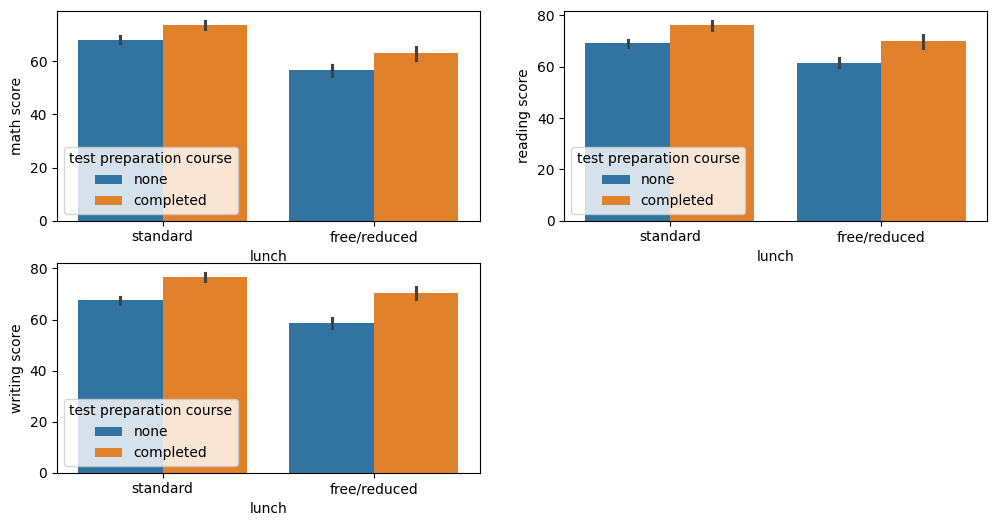

In [33]:
plt.figure(figsize=(12,6))
plt.subplot(2, 2, 1)
sns.barplot(x=df['lunch'], y=df['math score'],hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'], y=df['reading score'],hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'], y=df['writing score'],hue=df['test preparation course'])


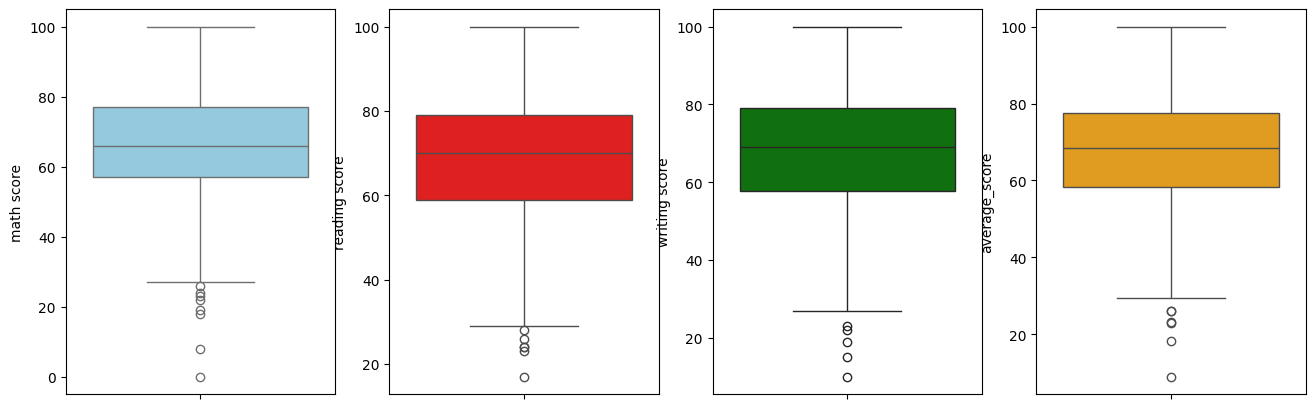

In [36]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='red')    
plt.subplot(143)
sns.boxplot(df['writing score'],color='green')
plt.subplot(144)
sns.boxplot(df['average_score'],color='orange')
plt.show()



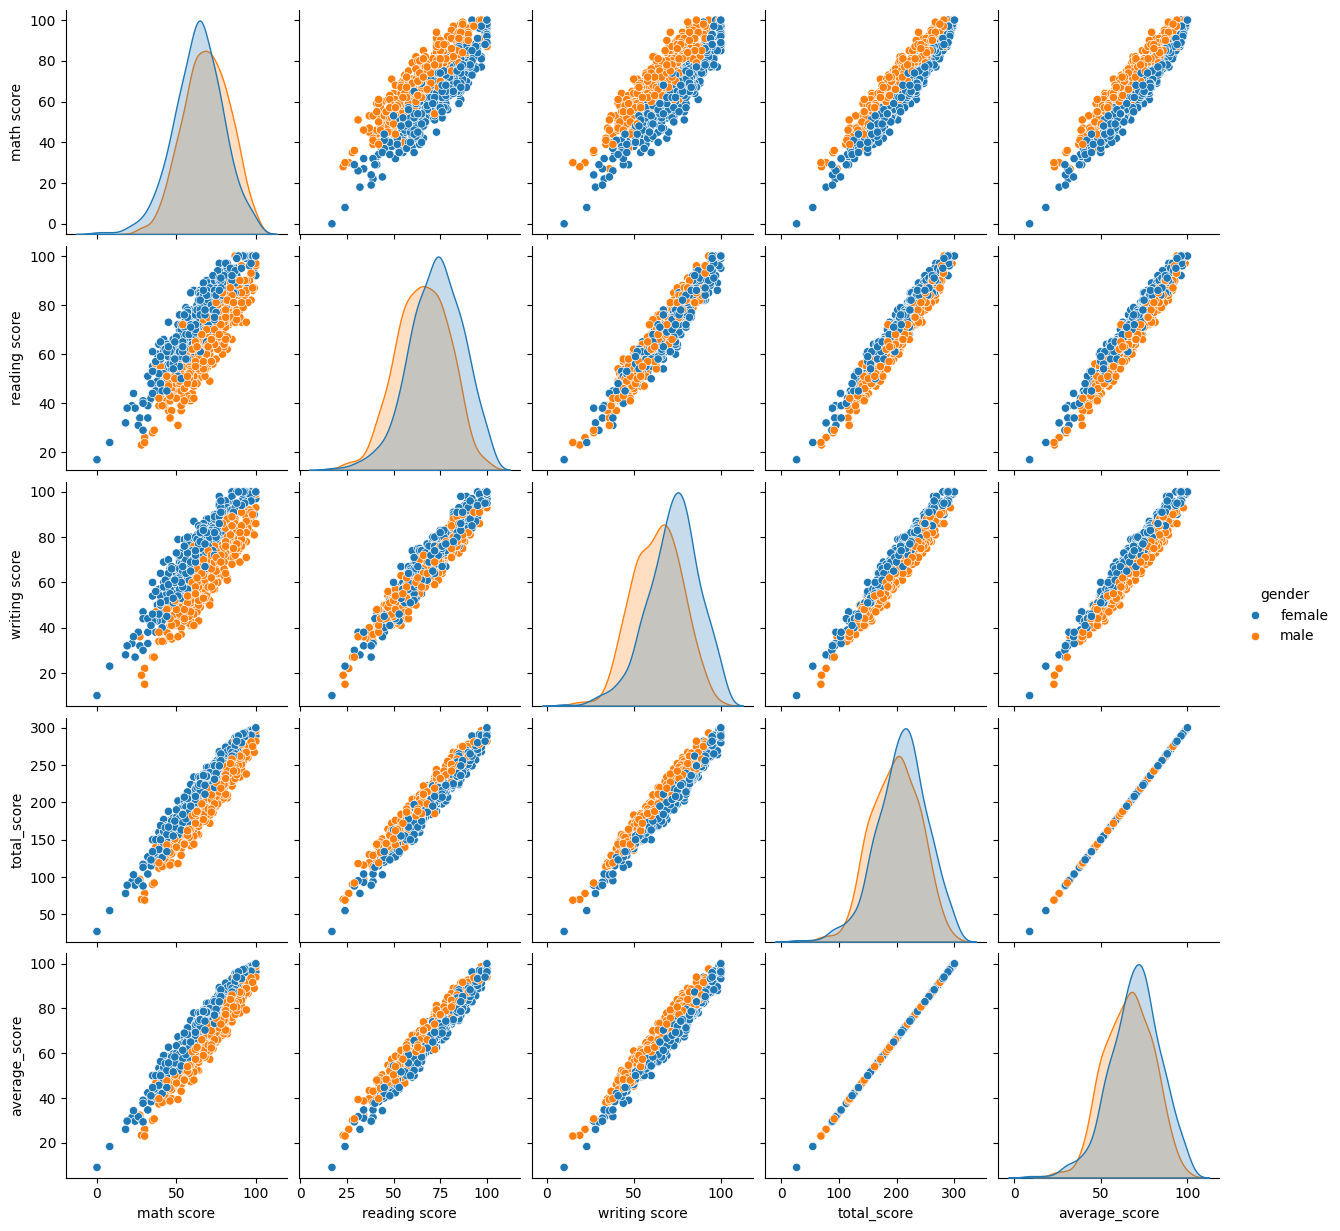

In [37]:
sns.pairplot(df,hue='gender')
plt.show()